In [1]:
from __future__ import print_function
import numpy as np
np.set_printoptions(threshold=np.nan)
np.random.seed(20170712)             
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
import sys

batch_size = 128
num_classes = 10
epochs = 1      

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

eval_image_idx = 1

print('static unsigned int test_data[784] = {')
for row in range(28):
    for col in range(28):
        sys.stdout.write('%3d,' % x_test[eval_image_idx][row][col])
    sys.stdout.write('\n')
print('};')

Using TensorFlow backend.


static unsigned int test_data[784] = {
  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,116,125,171,255,255,150, 93,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0,  0,  0,169,253,253,253,253,253,253,218, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0,  0,169,253,253,253,213,142,176,253,253,122,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0, 52,250,253,210, 32, 12,  0,  6,206,253,140,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0, 77,251,210, 25,  0,  0,  0,122,248,253, 65,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  0,  0,  0,  0,  0,  0,  0,  0, 31, 18,  0,  0,  0,  0,2

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


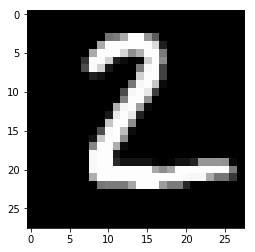

const unsigned int test_data[784] = {
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001784,0.001922,0.002630,0.003922,0.003922,0.002307,0.001430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

plt.imshow(x_test[eval_image_idx])
plt.gray()
plt.show()

images = x_test.reshape(10000, 28, 28)
print('const unsigned int test_data[784] = {')
for row in range(28):
    for col in range(28):
        sys.stdout.write('%f,' % images[eval_image_idx][row][col])
    sys.stdout.write('\n')
print('};')

print(y_test[eval_image_idx])

x_eval = images[eval_image_idx].reshape(1, 28, 28, 1)
y_eval = y_test[eval_image_idx].reshape(1, 10)

model_test = load_model('./mnist_cnn_train1_fine20_fine100.h5')

score = model_test.evaluate(x_eval, y_eval, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ret = model_test.predict(x_eval, 1, 1)
print(ret)

In [4]:
print(x_eval[0])

[[[  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]]

 [[  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.0000

In [5]:
layidx = 0;
get_intermediate_layer_output = K.function([model_test.layers[layidx].input], [model_test.layers[layidx].output])
layer_output = get_intermediate_layer_output([x_eval,])
print("lay[%d] output" % layidx)
print(layer_output[0].shape)
print(layer_output)

lay[0] output
(1, 24, 24, 16)
[array([[[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            1.77618433e-02,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   1.91106141e-01,   0.00000000e+00,
            0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            1.77618433e-02,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   1.91106141e-01,   0.00000000e+00,
            0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            1.77618433e-02,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.0

In [6]:
params = model_test.layers[layidx].get_weights()
print("lay[%d] biases" % layidx)
print(params[1].shape)
print(params[1])
print("\n")
print("lay[%d] weights" % layidx)
print(params[0].shape)
print(params[0])

lay[0] biases
(16,)
[-0.22810645 -0.02979142 -0.13719949 -0.03182339 -0.01259976 -0.08414232
  0.01776184 -0.11032965 -0.08114214 -0.05320494 -0.22760247 -0.05956283
 -0.00514234  0.19110614 -0.06121021 -0.09773685]


lay[0] weights
(5, 5, 1, 16)
[[[[  4.92317006e-02   1.92309506e-02  -2.68847972e-01   2.35979278e-02
     -7.38708004e-02  -7.15121329e-02   5.27472869e-02  -8.13765824e-02
      9.36493725e-02   8.48186016e-02  -2.39406433e-02   1.84871137e-01
      1.61638826e-01   2.71603435e-01  -1.43410843e-02   1.25588968e-01]]

  [[  6.06635511e-02   4.43167277e-02  -1.16088450e-01   3.96623276e-02
     -1.00738816e-01  -4.22607586e-02   1.07399903e-01  -8.85854810e-02
      1.33927926e-01   7.45391399e-02   3.91211584e-02  -7.58648012e-03
      2.28151858e-01   1.20101005e-01   2.23524235e-02  -2.56764501e-01]]

  [[  3.63890640e-02  -1.77471668e-01   6.53554425e-02   1.65251523e-01
     -1.24949731e-01  -4.43900302e-02   3.19813997e-01   1.81011006e-01
     -5.43739982e-02  -1.42

In [7]:
layidx = 1;
layer = K.function([model_test.layers[layidx].input], [model_test.layers[layidx].output])
layer_output = layer([layer_output[0],])
print("lay[%d] output" % layidx)
print(layer_output[0].shape)
print(layer_output)

lay[1] output
(1, 12, 12, 16)
[array([[[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            1.77618433e-02,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   1.91106141e-01,   0.00000000e+00,
            0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            1.77618433e-02,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   1.91106141e-01,   0.00000000e+00,
            0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            1.79009512e-02,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.0

In [8]:

layidx = 2;
layer = K.function([model_test.layers[layidx].input], [model_test.layers[layidx].output])
layer_output = layer([layer_output[0],])
print("lay[%d] output" % layidx)
print(layer_output[0].shape)
print(layer_output)

lay[2] output
(1, 8, 8, 32)
[array([[[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.02589392,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.05501609,  0.        ,  0.0422222 ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.02649053,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.05584625,  0.        ,  0.04205425,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        

In [9]:
params = model_test.layers[layidx].get_weights()
print("lay[%d] biases" % layidx)
print(params[1].shape)
print(params[1])
print("\n")
print("lay[%d] weights" % layidx)
print(params[0].shape)
print(params[0])

lay[2] biases
(32,)
[-0.02139492 -0.05437091 -0.00505841 -0.08121416 -0.015703    0.01619484
  0.06818998  0.04803498 -0.09506514 -0.01136778 -0.15422647 -0.06721765
 -0.02846401 -0.05853466 -0.06056242 -0.09345687  0.02379528  0.00181399
 -0.06907384 -0.0389149  -0.019842   -0.04086004 -0.15769428 -0.1233288
 -0.06084611 -0.03445644 -0.0589502  -0.08778712 -0.04463021 -0.0750569
 -0.05757397 -0.04063248]


lay[2] weights
(5, 5, 16, 32)
[[[[ -1.29590660e-01  -6.05178811e-02   7.02077523e-02   8.26056674e-02
     -1.20794019e-02  -1.17763989e-01  -1.46837100e-01   7.83142969e-02
      2.95372587e-02   8.38988367e-03  -8.89099091e-02   4.79884222e-02
      1.66454136e-01   1.67366434e-02   2.75598895e-02   1.17173001e-01
     -1.99850291e-01   3.00350860e-02  -2.15602294e-01  -1.13988481e-01
     -1.90377474e-01   1.19093418e-01   8.40441510e-03  -8.00578222e-02
      6.98856115e-02  -3.17737162e-02   1.55456021e-01   7.88343102e-02
     -1.92834020e-01  -1.01893023e-02   1.68461800e-01 

In [10]:
layidx = 3;
layer = K.function([model_test.layers[layidx].input], [model_test.layers[layidx].output])
layer_output = layer([layer_output[0],])
print("lay[%d] output" % layidx)
print(layer_output[0].shape)
print(layer_output)

lay[3] output
(1, 4, 4, 32)
[array([[[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.02744023,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.05584625,  0.        ,  0.0422222 ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.02996584,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.05339264,  0.        ,  0.04054666,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        

In [11]:
layidx = 5;
layer = K.function([model_test.layers[layidx].input], [model_test.layers[layidx].output])
layer_output = layer([layer_output[0],])
print("lay[%d] output" % layidx)
print(layer_output[0].shape)
print(layer_output)

lay[5] output
(1, 512)
[array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.02744023,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.05584625,  0.        ,  0.0422222 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.02996584,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.05339264,
         0.        ,  0.04054666,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.   

In [12]:
layidx = 6;
layer = K.function([model_test.layers[layidx].input], [model_test.layers[layidx].output])
layer_output = layer([layer_output[0],])
print("lay[%d] output" % layidx)
print(layer_output[0].shape)
print(layer_output)

lay[6] output
(1, 128)
[array([[ 0.04898358,  0.08892618,  0.06540002,  0.        ,  0.        ,
         0.06018456,  0.        ,  0.        ,  0.        ,  0.        ,
         0.1194476 ,  0.        ,  0.05623566,  0.03060756,  0.        ,
         0.20254745,  0.        ,  0.        ,  0.        ,  0.        ,
         0.07626627,  0.0235566 ,  0.        ,  0.        ,  0.07714342,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.07577463,  0.03265448,  0.06419197,
         0.0375789 ,  0.        ,  0.05042093,  0.        ,  0.        ,
         0.12550561,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.09618235,
         0.04996845,  0.        ,  0.05558886,  0.        ,  0.        ,
         0.        ,  0.03822382,  0.00486927,  0.13701645,  0.        ,
         0.        ,  0.        ,  0.00194766,  0.        ,  0.        ,
         0.12766585,  0.014

In [13]:
params = model_test.layers[layidx].get_weights()
print("lay[%d] biases" % layidx)
print(params[1].shape)
print(params[1])
print("\n")
print("lay[%d] weights" % layidx)
print(params[0].shape)
print(params[0])

lay[6] biases
(128,)
[ 0.02768685  0.06369296  0.03663929  0.00493249 -0.01003006  0.03308156
 -0.12204871 -0.0086014  -0.03279283 -0.10260695  0.0499409  -0.02739574
  0.06333405  0.01752751  0.02464024  0.07380451  0.03249396 -0.01092087
 -0.03111941  0.04204175  0.04709105  0.01191604 -0.05950416 -0.04196364
 -0.02547344 -0.03708098 -0.0318179  -0.06809829 -0.04002378  0.0159795
  0.01147689 -0.04695398 -0.00238784 -0.03625908 -0.00585853 -0.03570597
  0.00749597  0.00846505 -0.08263697  0.0292065   0.03254512 -0.02706588
  0.06901322  0.08059067 -0.0860324  -0.05033347 -0.02323426 -0.09631403
  0.06197395  0.03038885 -0.0005665  -0.00744536 -0.03724579 -0.02163715
 -0.07731236 -0.06111244  0.07078289 -0.0329586   0.04537018  0.02659994
 -0.02380348  0.04615562 -0.04257522  0.09985812 -0.06674991  0.03519379
 -0.00255418 -0.00032935  0.07742794 -0.02967314 -0.03984795 -0.06528674
 -0.04331554 -0.02359904  0.09815834  0.00674364 -0.08988947 -0.09818698
  0.05803942 -0.00645829  0.000

In [14]:
layidx = 8;
layer = K.function([model_test.layers[layidx].input], [model_test.layers[layidx].output])
layer_output = layer([layer_output[0],])
print("lay[%d] output" % layidx)
print(layer_output[0].shape)
print(layer_output)

lay[8] output
(1, 10)
[array([[ 0.0990313 ,  0.19824132,  0.08896971,  0.080445  ,  0.07709173,
         0.09042902,  0.0603778 ,  0.15736896,  0.07291272,  0.07513233]], dtype=float32)]


In [15]:
params = model_test.layers[layidx].get_weights()
print("lay[%d] biases" % layidx)
print(params[1].shape)
print(params[1])
print("\n")
print("lay[%d] weights" % layidx)
print(params[0].shape)
print(params[0])

lay[8] biases
(10,)
[ 0.17154162  0.24154387 -0.0511447  -0.06331088 -0.08605359 -0.10191119
 -0.19706286  0.06713938  0.08877204 -0.04567735]


lay[8] weights
(128, 10)
[[ -1.07794367e-01   2.52392113e-01   1.87987387e-01   6.23602867e-02
    1.41213253e-01  -3.72740859e-03  -1.44859582e-01  -1.88267604e-01
   -1.62069336e-01  -3.80654573e-01]
 [  1.35088516e-02   4.42427248e-01  -1.90609157e-01  -2.07769558e-01
   -3.03119328e-02  -1.79851010e-01  -3.18399519e-01  -7.27996649e-03
   -1.19493075e-01   1.28204703e-01]
 [ -3.06289285e-01   1.81247115e-01   1.82724968e-01   1.92344815e-01
   -2.06174821e-01  -2.93590486e-01   1.32738262e-01   1.85329378e-01
    1.62889674e-01  -1.77965060e-01]
 [  8.87200758e-02   1.52171731e-01  -3.49051416e-01  -2.48075306e-01
    2.01677650e-01  -1.21552475e-01   2.09581643e-01  -2.47672945e-01
    2.35486865e-01   2.31566727e-01]
 [  2.03288063e-01  -1.76003844e-01   1.06689796e-01   4.30525281e-02
   -4.97875363e-01  -6.12855144e-02  -1.86250001e-01